<a href="https://colab.research.google.com/github/kimsh519/ms-ai-school/blob/main/0510_keras_03_article.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [49]:
from keras.datasets import reuters
(train_data, train_labels),(test_data, test_labels) = reuters.load_data(num_words=10000)  #우선순위로 10000개 뽑아냄

In [50]:
print(train_data.shape)
print(test_data.shape)

(8982,)
(2246,)


In [51]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))

  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1
  
  return results

In [52]:
# 훈련데이터와 테스트 데이터의 벡터 변환 
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [53]:
# 라벨 데이터를 카테고리 데이터로 전환 
from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [54]:
# 모델 구성
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))
model.compile(optimizer = 'rmsprop',loss = 'categorical_crossentropy' , metrics = ['accuracy'])

In [55]:
# 검증용 데이터
x_val = x_train[:1000] # 처음부터 1000건
partial_x_train = x_train[1000:] # 1000번 이후로 다 학습용 데이터로 사용
y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [56]:
history = model.fit(partial_x_train,partial_y_train,epochs = 20, batch_size = 512, validation_data = (x_val,y_val))

Epoch 1/20
16/16 [==============================] - 2s 73ms/step - loss: 2.8258 - accuracy: 0.4682 - val_loss: 1.9403 - val_accuracy: 0.6180
Epoch 2/20
16/16 [==============================] - 1s 67ms/step - loss: 1.6365 - accuracy: 0.6728 - val_loss: 1.4789 - val_accuracy: 0.6570
Epoch 3/20
16/16 [==============================] - 2s 97ms/step - loss: 1.2588 - accuracy: 0.7239 - val_loss: 1.2495 - val_accuracy: 0.7190
Epoch 4/20
16/16 [==============================] - 2s 95ms/step - loss: 1.0307 - accuracy: 0.7784 - val_loss: 1.1102 - val_accuracy: 0.7640
Epoch 5/20
16/16 [==============================] - 1s 61ms/step - loss: 0.8565 - accuracy: 0.8163 - val_loss: 1.0260 - val_accuracy: 0.7710
Epoch 6/20
16/16 [==============================] - 1s 54ms/step - loss: 0.7127 - accuracy: 0.8479 - val_loss: 0.9670 - val_accuracy: 0.7940
Epoch 7/20
16/16 [==============================] - 1s 55ms/step - loss: 0.5975 - accuracy: 0.8712 - val_loss: 0.9305 - val_accuracy: 0.8070
Epoch 8/20
16

In [57]:
import matplotlib.pyplot as plt

In [61]:
loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

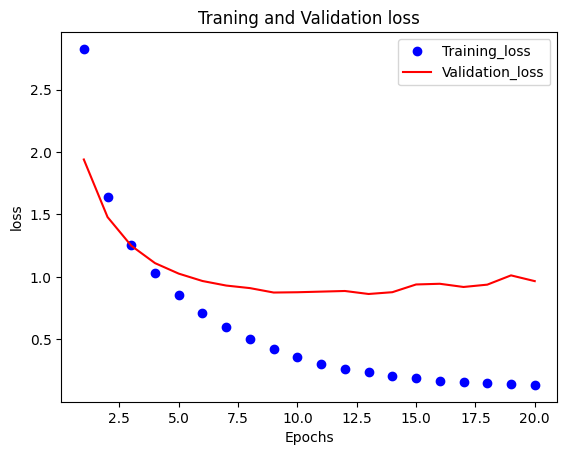

In [62]:
epochs = range(1,len(loss)+1)

plt.plot(epochs,loss,'bo',label = 'Training_loss')
plt.plot(epochs,val_loss,'r-',label = 'Validation_loss')
plt.title('Traning and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()

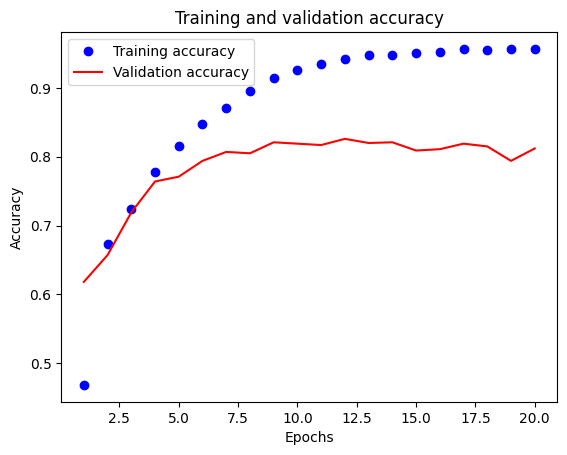

In [63]:
plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'r-', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

In [64]:
# 검증된 결과로 다시 학습
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))
model.compile(optimizer = 'rmsprop',loss = 'categorical_crossentropy' , metrics = ['accuracy'])

history = model.fit(partial_x_train,partial_y_train,epochs = 12, batch_size = 512, validation_data = (x_val,y_val))

eval_result = model.evaluate(x_test,one_hot_test_labels)
print(eval_result)

Epoch 1/12
16/16 [==============================] - 2s 73ms/step - loss: 2.6837 - accuracy: 0.5018 - val_loss: 1.7953 - val_accuracy: 0.6230
Epoch 2/12
16/16 [==============================] - 1s 83ms/step - loss: 1.5414 - accuracy: 0.6753 - val_loss: 1.3996 - val_accuracy: 0.6910
Epoch 3/12
16/16 [==============================] - 2s 95ms/step - loss: 1.2193 - accuracy: 0.7299 - val_loss: 1.2176 - val_accuracy: 0.7210
Epoch 4/12
16/16 [==============================] - 1s 72ms/step - loss: 1.0180 - accuracy: 0.7757 - val_loss: 1.1193 - val_accuracy: 0.7610
Epoch 5/12
16/16 [==============================] - 1s 51ms/step - loss: 0.8626 - accuracy: 0.8131 - val_loss: 1.0881 - val_accuracy: 0.7520
Epoch 6/12
16/16 [==============================] - 1s 53ms/step - loss: 0.7305 - accuracy: 0.8426 - val_loss: 0.9698 - val_accuracy: 0.7950
Epoch 7/12
16/16 [==============================] - 1s 52ms/step - loss: 0.6137 - accuracy: 0.8670 - val_loss: 0.9311 - val_accuracy: 0.7950
Epoch 8/12
16